## default parameter XGBoost model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
# === Helper function ===
def run_baseline(train_path, label='SalePrice', name=''):
    print(f"\n=== Running {name} ===")

    # 讀取資料
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 9:1 切分
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    # 建立模型（預設參數）
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # === 訓練集預測 ===
    preds_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_train = mean_absolute_error(y_train, preds_train)
    mape_train = np.mean(np.abs((y_train - preds_train) / y_train)) * 100

    # === 驗證集預測 ===
    preds_valid = model.predict(X_valid)
    rmse_valid = np.sqrt(mean_squared_error(y_valid, preds_valid))
    mae_valid = mean_absolute_error(y_valid, preds_valid)
    mape_valid = np.mean(np.abs((y_valid - preds_valid) / y_valid)) * 100

    # === 印出結果 ===
    print(f"[{name}] Performance Summary:")
    print(f"  ▸ Train RMSE = {rmse_train:.4f} | MAE = {mae_train:.4f} | MAPE = {mape_train:.2f}%")
    print(f"  ▸ Valid RMSE = {rmse_valid:.4f} | MAE = {mae_valid:.4f} | MAPE = {mape_valid:.2f}%")

    # === 可視化 ===
    def plot_actual_vs_pred(y_true, y_pred, title):
        sample_idx = np.random.choice(len(y_true), size=min(100, len(y_true)), replace=False)
        plt.figure(figsize=(6, 6))
        plt.scatter(y_true.iloc[sample_idx], y_pred[sample_idx], alpha=0.7, edgecolor='k')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.title(title)
        plt.xlabel("Actual SalePrice")
        plt.ylabel("Predicted SalePrice")
        plt.show()

    plot_actual_vs_pred(
        y_train, preds_train,
        f"{name} — Train Set\nRMSE={rmse_train:.4f} | MAE={mae_train:.4f} | MAPE={mape_train:.2f}%"
    )

    plot_actual_vs_pred(
        y_valid, preds_valid,
        f"{name} — Validation Set (10%)\nRMSE={rmse_valid:.4f} | MAE={mae_valid:.4f} | MAPE={mape_valid:.2f}%"
    )

    return model, rmse_train, mae_train, mape_train, rmse_valid, mae_valid, mape_valid


=== Running Cleaned_all_features ===
[Cleaned_all_features] Performance Summary:
  ▸ Train RMSE = 1060.0737 | MAE = 733.4173 | MAPE = 0.48%
  ▸ Valid RMSE = 28014.2447 | MAE = 17843.5055 | MAPE = 9.75%


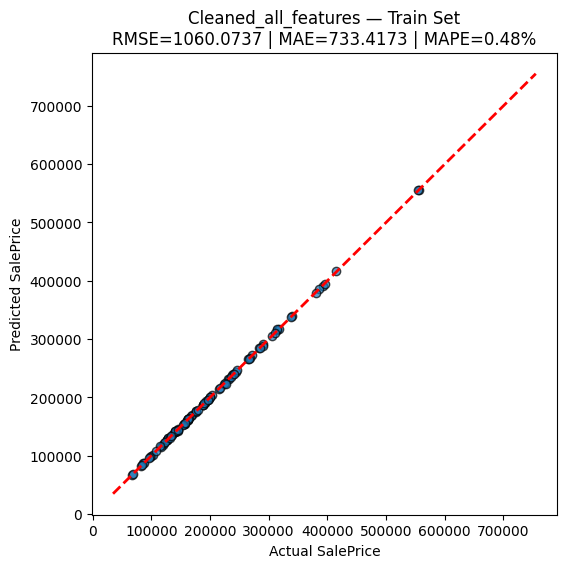

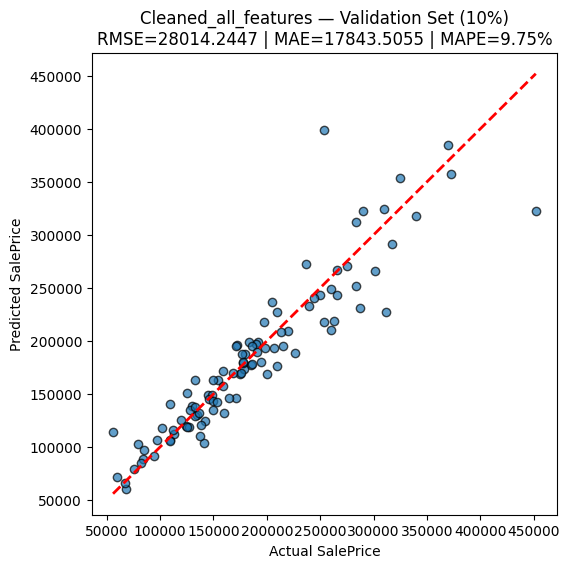

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1060.0737416650948,
 733.417305312262,
 0.47899160215989023,
 28014.244728073805,
 17843.505511558218,
 9.74540855905398)

In [18]:
# Cleaned version
run_baseline("./data/cleaned/train.csv", name="Cleaned_all_features")


=== Running Method1_Mutual_Info ===
[Method1_Mutual_Info] Performance Summary:
  ▸ Train RMSE = 983.5301 | MAE = 667.3604 | MAPE = 0.44%
  ▸ Valid RMSE = 25946.3152 | MAE = 16567.3409 | MAPE = 9.35%


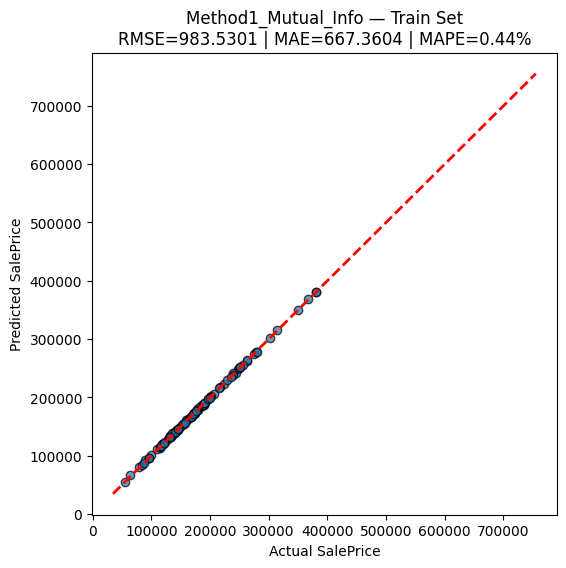

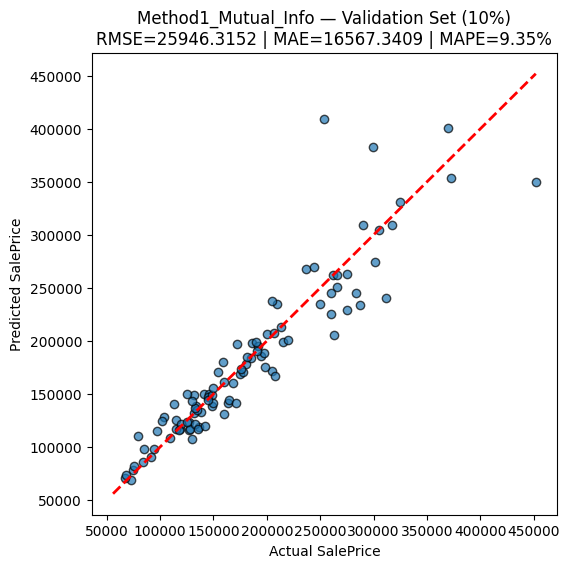

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 983.5301035092443,
 667.3603775942498,
 0.43541965502841806,
 25946.315177274675,
 16567.340860445205,
 9.351590003549488)

In [20]:
# Method 1 (Mutual Information)
run_baseline("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== Running Method2_XGBoost_CV ===
[Method2_XGBoost_CV] Performance Summary:
  ▸ Train RMSE = 1612.4429 | MAE = 1108.1668 | MAPE = 0.75%
  ▸ Valid RMSE = 24594.6613 | MAE = 16772.1933 | MAPE = 10.21%


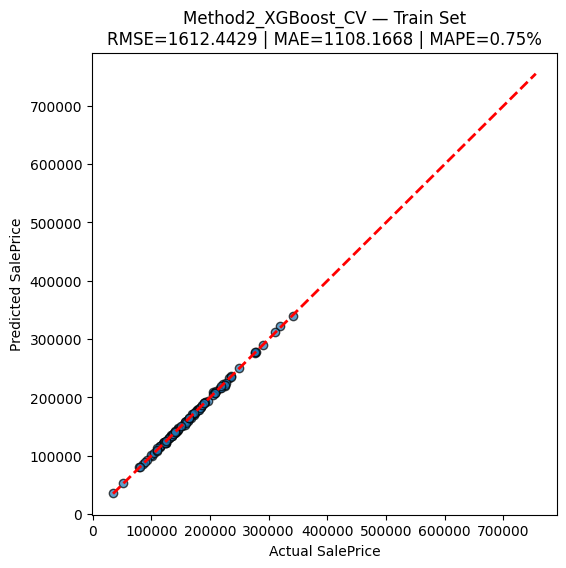

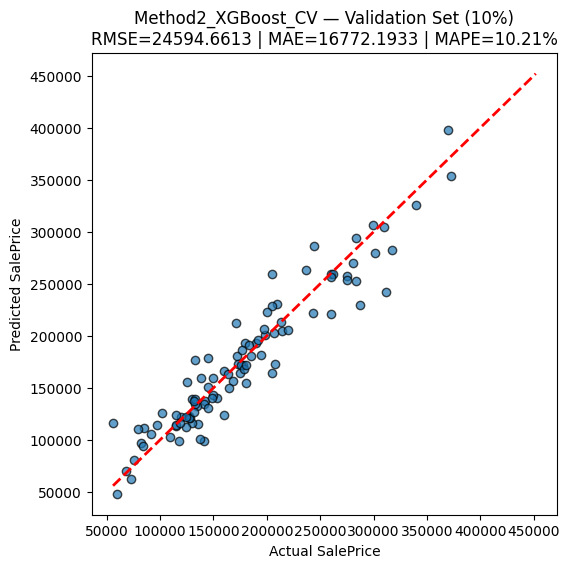

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1612.4429293274945,
 1108.16681145278,
 0.7494123269982008,
 24594.66130065262,
 16772.193252354453,
 10.206238630696957)

In [21]:
# Method 2 (XGBoost CV)
run_baseline("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

## optimization parameter

### GridSearch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def run_grid_search(train_path, label='SalePrice', name=''):
    print(f"\n=== GridSearch on {name} ===")
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 9:1 hold-out split（仅用于最终评估；GridSearch 内部再做 3-fold CV）
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=42)

    # 基础模型
    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    # 参数网格（小而有效，偏向抑制过拟合）
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [300, 600, 900],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'reg_lambda': [0.0, 1.0, 5.0],
        'reg_alpha': [0.0, 0.1, 0.5],
    }

    gs = GridSearchCV(
        estimator=base,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  # 越大越好
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True  # 用最佳参数在 (X_tr, y_tr) 重新拟合
    )

    gs.fit(X_tr, y_tr)

    print("Best params:", gs.best_params_)
    print("Best CV RMSE:", -gs.best_score_)

    best_model = gs.best_estimator_

    # 训练集与验证集评估（基于 hold-out）
    pred_tr = best_model.predict(X_tr)
    pred_va = best_model.predict(X_va)

    rmse_tr, mae_tr, mape_tr = metrics(y_tr, pred_tr)
    rmse_va, mae_va, mape_va = metrics(y_va, pred_va)

    print(f"[{name}] Hold-out Performance")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # 可视化
    plot_actual_vs_pred(
        y_tr, pred_tr,
        f"{name} — Train (best params)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    plot_actual_vs_pred(
        y_va, pred_va,
        f"{name} — Valid 10% (best params)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return best_model, gs.best_params_, {
        "train": (rmse_tr, mae_tr, mape_tr),
        "valid": (rmse_va, mae_va, mape_va)
    }


=== GridSearch on Cleaned_all_features ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 30792.157254833714
[Cleaned_all_features] Hold-out Performance
  ▸ Train  RMSE=4523.6375 | MAE=3540.4072 | MAPE=2.28%
  ▸ Valid  RMSE=22602.9667 | MAE=15175.0697 | MAPE=8.57%


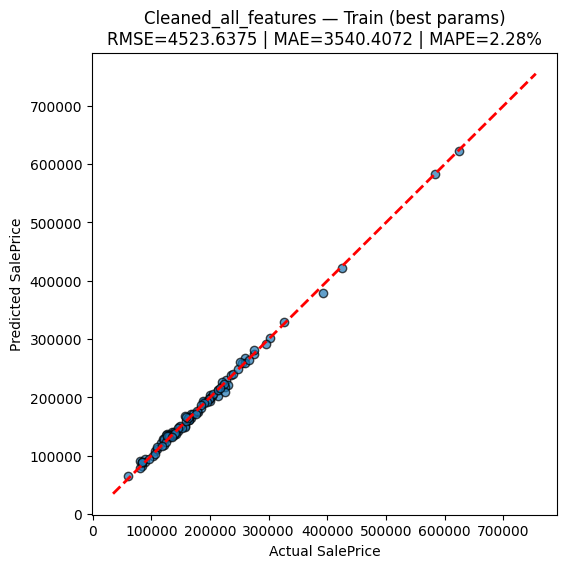

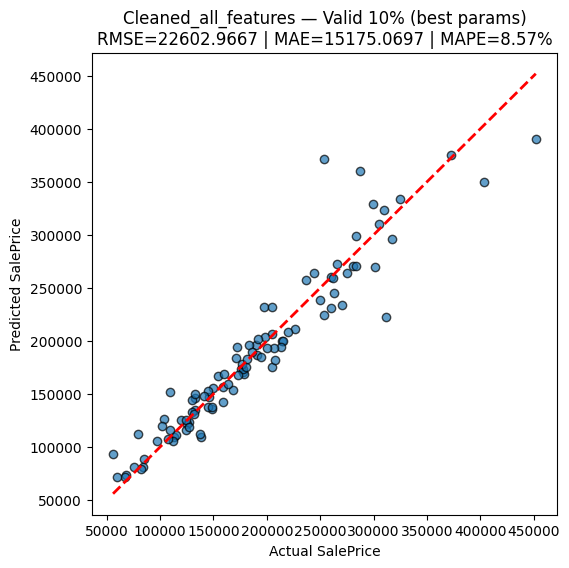

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (4523.637479589395, 3540.40721094345, 2.2824034027137774),
  'valid': (22602.966727055

In [30]:
run_grid_search("./data/cleaned/train.csv", name="Cleaned_all_features")


=== GridSearch on Method1_Mutual_Info ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 900, 'reg_alpha': 0.1, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 31874.219378643542
[Method1_Mutual_Info] Hold-out Performance
  ▸ Train  RMSE=2839.6250 | MAE=2249.2591 | MAPE=1.47%
  ▸ Valid  RMSE=23103.6802 | MAE=15296.0199 | MAPE=8.51%


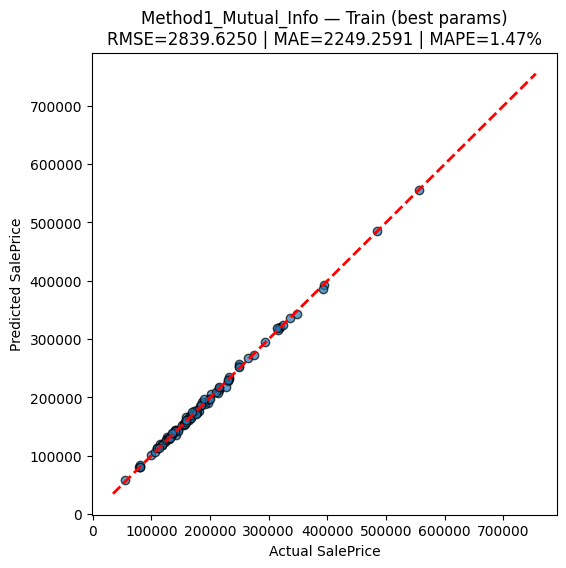

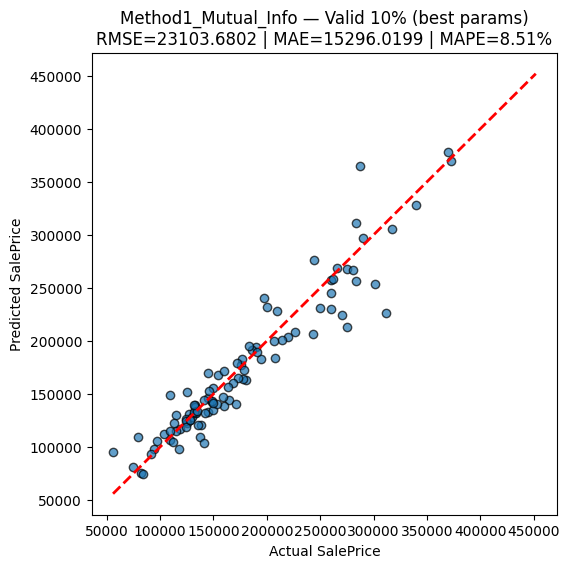

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 4,
  'n_estimators': 900,
  'reg_alpha': 0.1,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (2839.6250030260626, 2249.259109624905, 1.4676113371931727),
  'valid': (23103.68023

In [ ]:
run_grid_search("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== GridSearch on Method2_XGBoost_CV ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 1.0}
Best CV RMSE: 31182.683765871643
[Method2_XGBoost_CV] Hold-out Performance
  ▸ Train  RMSE=9788.8902 | MAE=6907.2373 | MAPE=4.56%
  ▸ Valid  RMSE=23292.0875 | MAE=16091.6317 | MAPE=9.60%


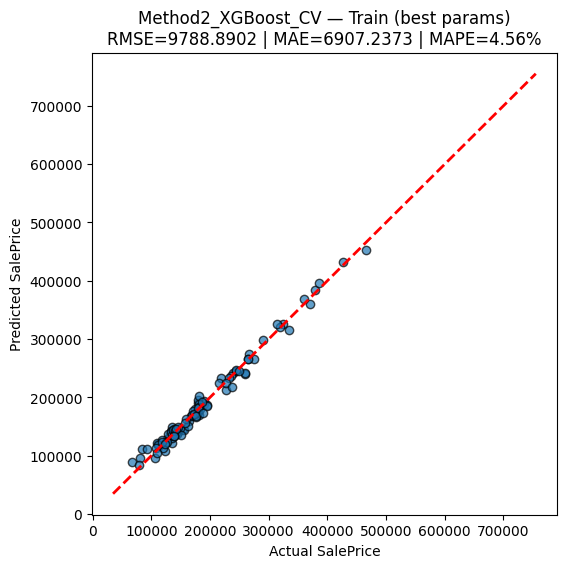

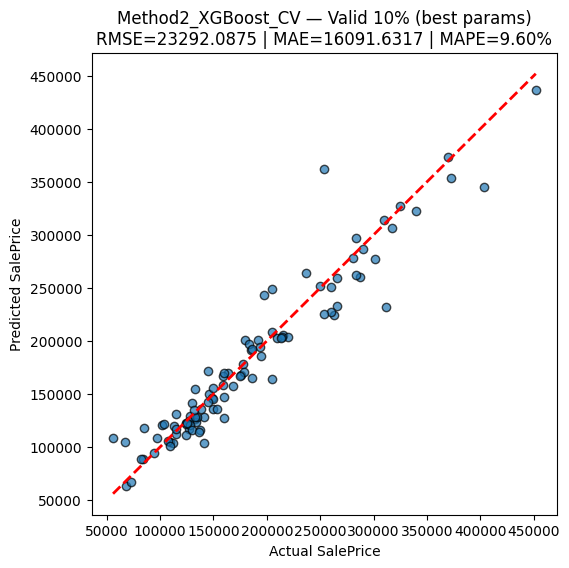

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 5.0,
  'subsample': 1.0},
 {'train': (9788.890208172685, 6907.2372608054075, 4.557166689843721),
  'valid': (23292.087469

In [ ]:
run_grid_search("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

### more specific GridSearch

In [31]:
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_actual_vs_pred(y_true, y_pred, title):
    idx = np.random.choice(len(y_true), size=min(100, len(y_true)), replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def run_two_stage_grid(train_path, label='SalePrice', name=''):
    print(f"\n=== Two-Stage GridSearch on {name} ===")
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 固定 9:1 hold-out（最終評估用；GridSearch 內用 3-Fold CV）
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=42)

    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    # -------- Stage A：寬網格（粗篩） --------
    param_grid_A = {
        'max_depth':        [3, 5, 7],
        'min_child_weight': [1, 4],
        'gamma':            [0.0, 0.2],
        'learning_rate':    [0.03, 0.07, 0.1],
        'n_estimators':     [300, 600, 900],
        'subsample':        [0.7, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'reg_lambda':       [0.0, 3.0, 6.0],
        'reg_alpha':        [0.0, 0.5, 1.0],
    }
    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE:", -gsA.best_score_)

    # -------- Stage B：精修網格（圍繞 Stage A 最佳點）--------
    # 小工具：圍繞一個數字生成鄰域（去重 + 夾緊邏輯）
    def around(v, choices):
        s = sorted(set(choices))
        return s

    lr = bestA['learning_rate']
    md = bestA['max_depth']
    ne = bestA['n_estimators']
    ss = bestA['subsample']
    cs = bestA['colsample_bytree']
    rl = bestA['reg_lambda']
    ra = bestA['reg_alpha']
    mc = bestA['min_child_weight']
    gm = bestA['gamma']

    param_grid_B = {
        'max_depth':        sorted(set([max(2, md-1), md, md+1])),
        'min_child_weight': sorted(set([max(1, mc-1), mc, mc+2])),
        'gamma':            sorted(set([max(0.0, gm-0.1), gm, gm+0.1])),
        'learning_rate':    sorted(set([max(0.01, lr/2), lr, min(0.2, lr*1.5)])),
        'n_estimators':     sorted(set([max(100, ne-200), ne, ne+300])),
        'subsample':        sorted(set([max(0.5, ss-0.1), ss, min(1.0, ss+0.1)])),
        'colsample_bytree': sorted(set([max(0.5, cs-0.1), cs, min(1.0, cs+0.1)])),
        'reg_lambda':       sorted(set([max(0.0, rl-2.0), rl, rl+2.0])),
        'reg_alpha':        sorted(set([max(0.0, ra-0.2), ra, ra+0.2])),
    }

    gsB = GridSearchCV(
        estimator=base,
        param_grid=param_grid_B,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsB.fit(X_tr, y_tr)
    bestB = gsB.best_params_
    print("[Stage B] Best params:", bestB)
    print("[Stage B] Best CV RMSE:", -gsB.best_score_)

    best_model = gsB.best_estimator_

    # ---- 最終 hold-out 評估 ----
    pred_tr = best_model.predict(X_tr)
    pred_va = best_model.predict(X_va)

    rmse_tr, mae_tr, mape_tr = metrics(y_tr, pred_tr)
    rmse_va, mae_va, mape_va = metrics(y_va, pred_va)

    print(f"[{name}] Hold-out Performance (Stage B best)")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    plot_actual_vs_pred(
        y_tr, pred_tr,
        f"{name} — Train (Stage B best)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    plot_actual_vs_pred(
        y_va, pred_va,
        f"{name} — Valid 10% (Stage B best)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return best_model, {'StageA': bestA, 'StageB': bestB}, {
        'train': (rmse_tr, mae_tr, mape_tr),
        'valid': (rmse_va, mae_va, mape_va)
    }



=== Two-Stage GridSearch on Cleaned_all_features ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 900, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 30959.815079776774
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
[Stage B] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9}
[Stage B] Best CV RMSE: 30895.92403887356
[Cleaned_all_features] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=7769.5612 | MAE=5772.9679 | MAPE=3.68%
  ▸ Valid  RMSE=21520.8064 | MAE=14305.1580 | MAPE=8.02%


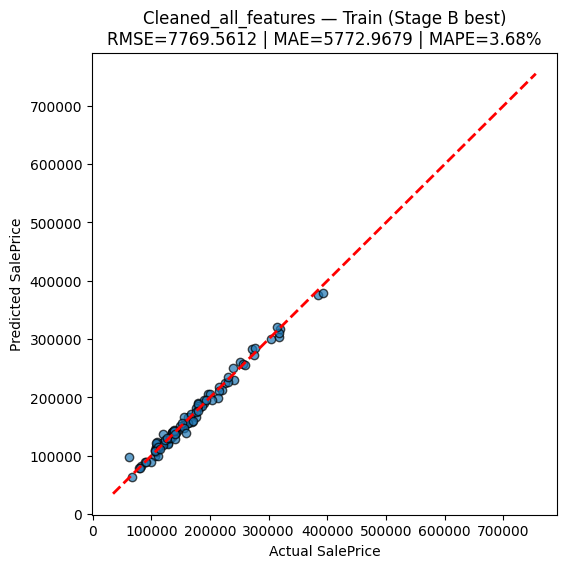

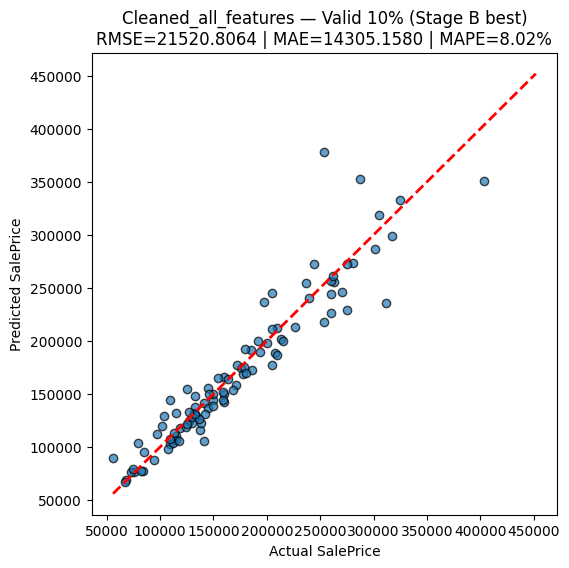

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 1.0,
   'gamma': 0.0,
   'learning_rate': 0.03,
   'max_depth': 3,
   'min_child_weight': 4,
   'n_estimators': 900,
   'reg_alpha': 0.0,
   'reg_lambda': 0.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 1.0,


In [32]:
run_two_stage_grid("./data/cleaned/train.csv",name="Cleaned_all_features")



=== Two-Stage GridSearch on Method1_Mutual_Info ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 900, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 31886.94538531076
Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
[Stage B] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.045, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 700, 'reg_alpha': 0.7, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage B] Best CV RMSE: 31473.43042981262
[Method1_Mutual_Info] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=2465.3527 | MAE=1801.9733 | MAPE=1.18%
  ▸ Valid  RMSE=22704.4490 | MAE=15313.3716 | MAPE=8.74%


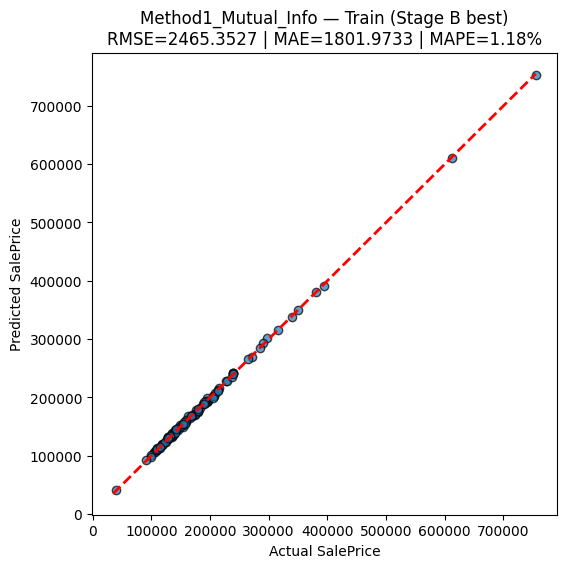

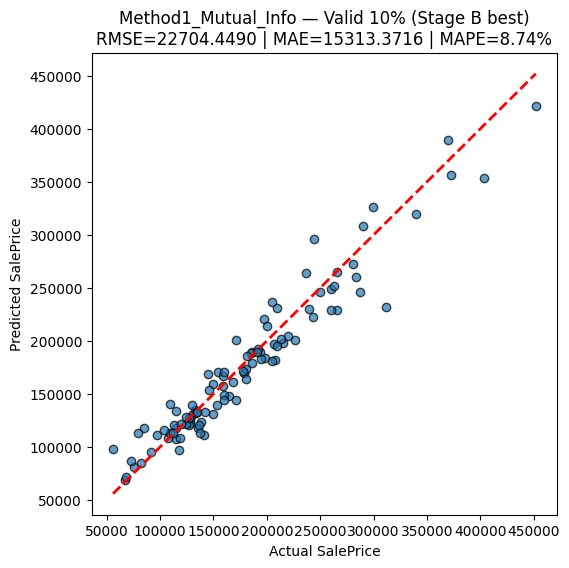

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.045, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 0.9,
   'gamma': 0.0,
   'learning_rate': 0.03,
   'max_depth': 5,
   'min_child_weight': 1,
   'n_estimators': 900,
   'reg_alpha': 0.5,
   'reg_lambda': 0.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 1.0,


In [34]:
run_two_stage_grid("./data/Method1,selected//train_filter.csv",name="Method1_Mutual_Info")



=== Two-Stage GridSearch on Method2_XGBoost_CV ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 6.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 30814.989377615708
Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
[Stage B] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.035, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 8.0, 'subsample': 0.9}
[Stage B] Best CV RMSE: 30712.2043457166
[Method2_XGBoost_CV] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=14681.9699 | MAE=10344.8446 | MAPE=6.58%
  ▸ Valid  RMSE=22769.6862 | MAE=15539.3249 | MAPE=9.27%


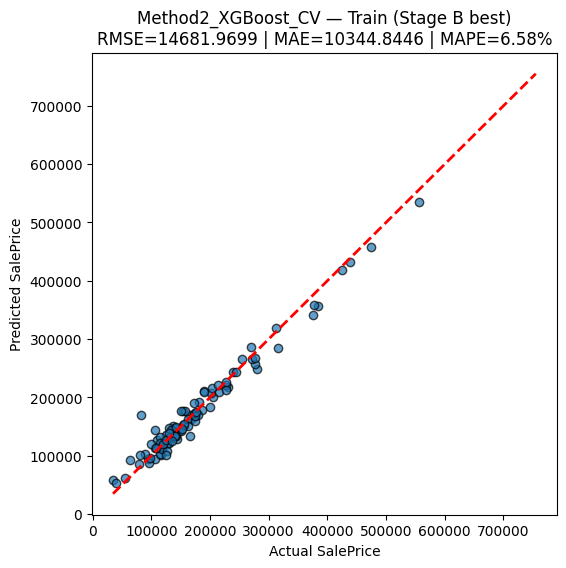

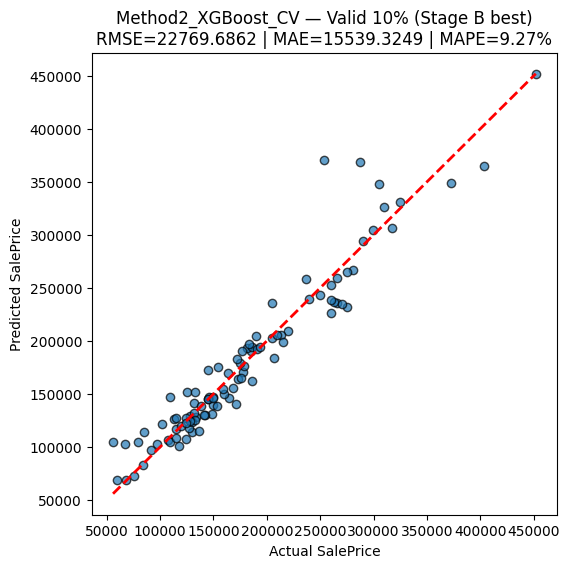

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 0.7,
   'gamma': 0.0,
   'learning_rate': 0.07,
   'max_depth': 5,
   'min_child_weight': 1,
   'n_estimators': 300,
   'reg_alpha': 0.0,
   'reg_lambda': 6.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 0.7,


In [35]:
run_two_stage_grid("./data/Method2,selected/train_Method2_selected.csv",name="Method2_XGBoost_CV")


###  log + GridSearch

In [27]:
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_loss_from_evals_result(evals_result, best_round=None, title="Training vs Validation RMSE (log target)"):
    try:
        tr = evals_result['validation_0']['rmse']
        va = evals_result['validation_1']['rmse']
    except Exception as e:
        print(f"Warning: cannot parse evals_result_: {e}")
        return
    plt.figure(figsize=(7,5))
    plt.plot(tr, label='Train RMSE (log target)')
    plt.plot(va, label='Valid RMSE (log target)')
    if best_round is not None and 0 <= best_round < len(va):
        plt.axvline(best_round, color='k', linestyle='--', alpha=0.6)
        plt.scatter([best_round], [va[best_round]], s=50, color='red', zorder=3)
        plt.text(best_round, va[best_round], f"  best={best_round}\n  val_rmse={va[best_round]:.4f}",
                 va='bottom', ha='left')
    plt.xlabel('Boosting rounds'); plt.ylabel('RMSE (log space)')
    plt.title(title); plt.grid(alpha=0.3); plt.legend(); plt.show()

def eval_with_log_target(train_path, best_params, label='SalePrice', rs=42,
                         plot_loss=True, early_stopping_rounds=100):
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label].astype(float)

    # 9:1 切分
    X_tr, X_va, y_tr_raw, y_va_raw = train_test_split(X, y, test_size=0.3, random_state=rs)
    y_tr = np.log1p(y_tr_raw)
    y_va = np.log1p(y_va_raw)

    model = XGBRegressor(objective='reg:squarederror', random_state=rs, n_jobs=-1, **best_params)

    # --- 训练（新版优先；旧版回退） ---
    used_fallback = False
    try:
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            eval_metric='rmse',
            early_stopping_rounds=early_stopping_rounds,
            verbose=False
        )
    except TypeError:
        used_fallback = True
        model.set_params(eval_metric='rmse')  # 旧版：用 set_params 设置 metric
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            verbose=False
        )

    # --- 读取曲线并找 best_round（验证集最小 rmse 的轮次） ---
    evals_result = model.evals_result()
    val_curve = evals_result['validation_1']['rmse']
    best_round = int(np.argmin(val_curve))  # 0-based
    best_log_rmse_valid = float(val_curve[best_round])
    best_log_rmse_train = float(evals_result['validation_0']['rmse'][best_round])

    # --- 在 best_round 做预测（兼容不同版本 API） ---
    def _predict_at_round(m, X, best_round):
        # 新版优先：iteration_range
        try:
            return m.predict(X, iteration_range=(0, best_round + 1))
        except TypeError:
            # 旧版：ntree_limit
            return m.predict(X, ntree_limit=best_round + 1)

    pred_tr_best = np.expm1(_predict_at_round(model, X_tr, best_round))
    pred_va_best = np.expm1(_predict_at_round(model, X_va, best_round))

    rmse_tr_b, mae_tr_b, mape_tr_b = _metrics(y_tr_raw, pred_tr_best)
    rmse_va_b, mae_va_b, mape_va_b = _metrics(y_va_raw, pred_va_best)

    print("[LOG target] Hold-out — Metrics at BEST ROUND")
    print(f"  ▸ Best round (0-based) = {best_round}  "
          f"(train_log_rmse={best_log_rmse_train:.4f}, valid_log_rmse={best_log_rmse_valid:.4f})")
    if used_fallback:
        print("  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.")
    print(f"  ▸ Train RMSE={rmse_tr_b:.4f} | MAE={mae_tr_b:.4f} | MAPE={mape_tr_b:.2f}%")
    print(f"  ▸ Valid RMSE={rmse_va_b:.4f} | MAE={mae_va_b:.4f} | MAPE={mape_va_b:.2f}%")

    if plot_loss:
        _plot_loss_from_evals_result(
            evals_result, best_round=best_round,
            title="XGBoost Training vs Validation RMSE per round (log target)"
        )

    return (model,
            {"best_round": best_round,
             "best_log_rmse": {"train": best_log_rmse_train, "valid": best_log_rmse_valid},
             "orig_metrics_at_best_round": {
                 "train": (rmse_tr_b, mae_tr_b, mape_tr_b),
                 "valid": (rmse_va_b, mae_va_b, mape_va_b)
             }})

[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 1466  (train_log_rmse=0.0687, valid_log_rmse=0.1288)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=13905.1798 | MAE=8667.8082 | MAPE=4.85%
  ▸ Valid RMSE=25270.7250 | MAE=15216.3980 | MAPE=9.11%


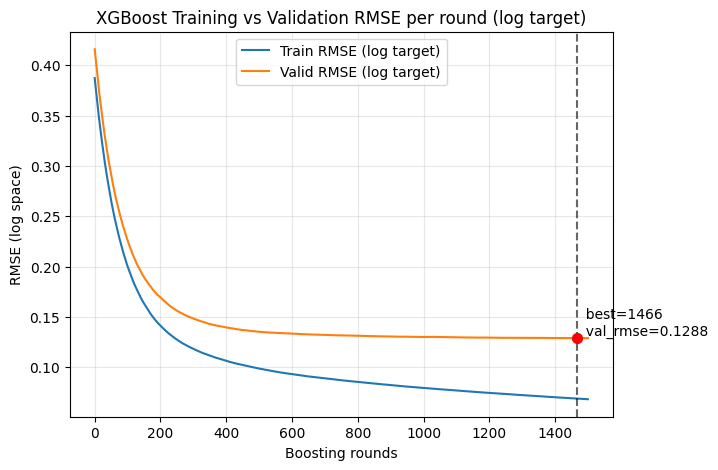

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 1466,
  'best_log_rmse': {'train': 0.06874232793711998,
   'valid': 0.12879451844174722},
  'orig_metrics_at_best_round': {'train': (13905.179837283209,
    8667.808188203966,
    4.8480320439655005),
   'valid': (25270

In [28]:
# cleaned version
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.2, 'reg_lambda': 4.0, 'subsample': 0.6
}
eval_with_log_target("./data/cleaned/train.csv", best_params_from_linear)


[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 598  (train_log_rmse=0.0740, valid_log_rmse=0.1352)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=15495.9209 | MAE=9261.6672 | MAPE=5.15%
  ▸ Valid RMSE=28117.4367 | MAE=15716.7790 | MAPE=9.33%


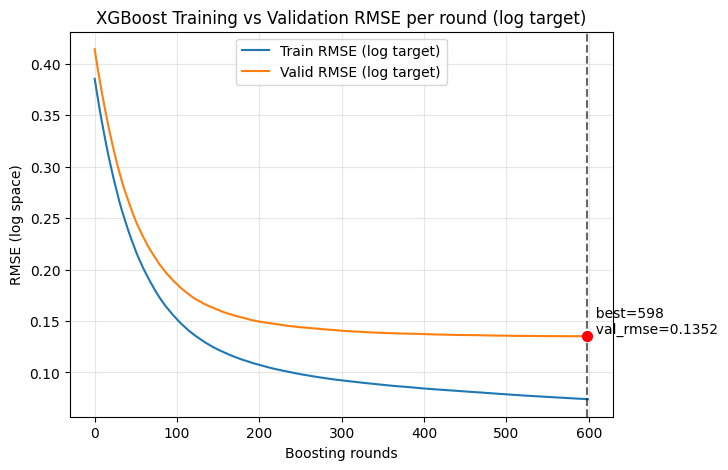

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 598,
  'best_log_rmse': {'train': 0.07399152893586362, 'valid': 0.1351613437510111},
  'orig_metrics_at_best_round': {'train': (15495.920944671512,
    9261.667169135651,
    5.150590705724566),
   'valid': (28117.436661576863, 15716.77

In [29]:
# methond 1
best_params_from_linear = {
    'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 600, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 4.0, 'subsample': 0.6
}
eval_with_log_target("./data/featured/Method1,selected/train_filter.csv", best_params_from_linear)

[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 1099  (train_log_rmse=0.0960, valid_log_rmse=0.1355)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=19305.8625 | MAE=11880.6481 | MAPE=6.79%
  ▸ Valid RMSE=23935.3104 | MAE=15595.6191 | MAPE=9.61%


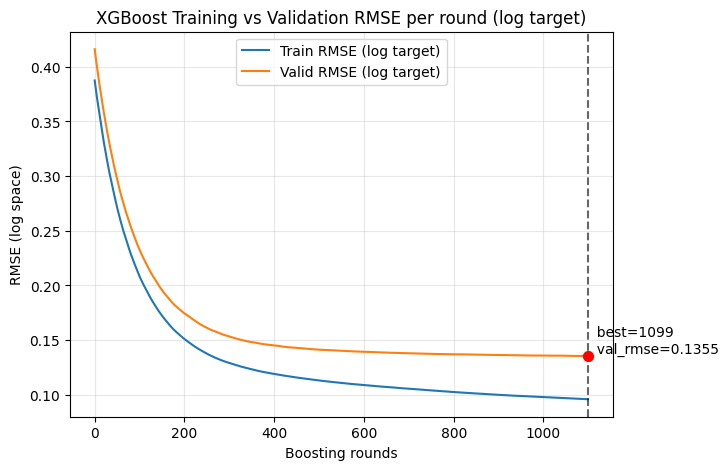

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 1099,
  'best_log_rmse': {'train': 0.09595167736574818,
   'valid': 0.13548536200623096},
  'orig_metrics_at_best_round': {'train': (19305.86247497708,
    11880.648089342556,
    6.787067774192658),
   'valid': (23935.

In [34]:
# method 2
# 'learning_rate': 0.013333333333333334，'n_estimators': 1100
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1100, 'reg_alpha': 0.4, 'reg_lambda': 8.0, 'subsample': 0.6
}
eval_with_log_target("./data/featured/Method2,selected/train_Method2_selected.csv", best_params_from_linear)

[LOG target] Hold-out — Metrics at BEST ROUND
  ▸ Best round (0-based) = 858  (train_log_rmse=0.0833, valid_log_rmse=0.1346)
  ▸ Note: xgboost old API detected (no eval_metric/early_stopping in fit); used fallback mode.
  ▸ Train RMSE=16159.8343 | MAE=10230.5976 | MAPE=5.89%
  ▸ Valid RMSE=23092.5266 | MAE=15670.5060 | MAPE=9.66%


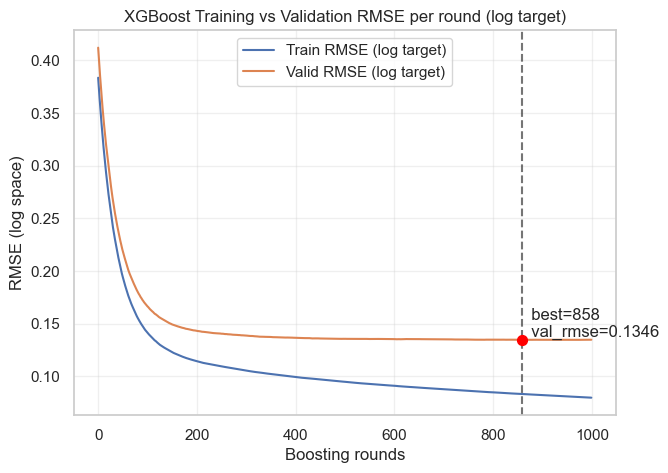

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'best_round': 858,
  'best_log_rmse': {'train': 0.08331235455471453,
   'valid': 0.13463508545070793},
  'orig_metrics_at_best_round': {'train': (16159.834332200802,
    10230.597602687316,
    5.893925129164098),
   'valid': (23092.526620109562, 15

In [136]:
# method 3
best_params_from_linear = {
    'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 8.0, 'subsample': 0.7
}
eval_with_log_target("./data/featured/Method2,selected/train_Method2_selected.csv", best_params_from_linear)

In [132]:
# --------- 工具函数 ---------
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def _plot_loss(evals_result, title="Training vs Validation RMSE (log target)"):
    """绘制 XGBoost 在 eval_set 上每轮的 RMSE（注意：这里是 log 目标的 RMSE）"""
    # evals_result_ 的 key 通常是 'validation_0', 'validation_1'
    train_key = 'validation_0'
    valid_key = 'validation_1'
    metric = 'rmse'
    if (train_key not in evals_result) or (valid_key not in evals_result):
        print("Warning: evals_result_ missing expected keys; skip loss plot.")
        return
    tr = evals_result[train_key].get(metric, None)
    va = evals_result[valid_key].get(metric, None)
    if (tr is None) or (va is None):
        print("Warning: rmse metric not found in evals_result_; skip loss plot.")
        return

    plt.figure(figsize=(7,5))
    plt.plot(tr, label='Train RMSE (log target)')
    plt.plot(va, label='Valid RMSE (log target)')
    plt.xlabel('Boosting rounds')
    plt.ylabel('RMSE (log space)')
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# --------- 两阶段网格（LOG 目标，从零开始；7:3 切分；CV=5） ---------
def run_two_stage_grid_LOG(train_path, label='SalePrice', name='', random_state=42):
    print(f"\n=== Two-Stage GridSearch (LOG target) on {name} ===")

    # 读取与切分
    df = pd.read_csv(train_path)
    X  = df.drop(columns=[label])
    y0 = df[label].astype(float)

    # 目标做 log1p（训练/交叉验证用）；评估时再 expm1 回原尺度
    y = np.log1p(y0)

    # 7:3 hold-out（仅用于最终报告）；GridSearch 内部再做 5-fold CV
    X_tr, X_va, y0_tr, y0_va = train_test_split(X, y0, test_size=0.3, random_state=random_state)
    # 为了与上面划分保持一致，用相同的 random_state 再切分 y 的对应版本
    _,   _,   y_tr,  y_va  = train_test_split(X, y,  test_size=0.3, random_state=random_state)

    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1
    )

    # ---------- Stage A：宽网格（粗筛） ----------
    param_grid_A = {
        'max_depth':        [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma':            [0.0, 0.1, 0.2],
        'learning_rate':    [0.02, 0.05, 0.1],
        'n_estimators':     [400, 800, 1200],
        'subsample':        [0.7, 0.85, 1.0],
        'colsample_bytree': [0.7, 0.85, 1.0],
        'reg_lambda':       [0.0, 2.0, 6.0],
        'reg_alpha':        [0.0, 0.2, 0.6],
    }
    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',
        cv=5,                 # ← 改为 5 折
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE:", -gsA.best_score_)

    # ---------- Stage B：围绕最佳点精修 ----------
    md, mc, gm = bestA['max_depth'], bestA['min_child_weight'], bestA['gamma']
    lr, ne     = bestA['learning_rate'], bestA['n_estimators']
    ss, cs     = bestA['subsample'], bestA['colsample_bytree']
    rl, ra     = bestA['reg_lambda'], bestA['reg_alpha']

    param_grid_B = {
        'max_depth':        sorted(set([max(2, md-1), md, md+1])),
        'min_child_weight': sorted(set([max(1, mc-1), mc, mc+2])),
        'gamma':            sorted(set([max(0.0, gm-0.05), gm, gm+0.05])),
        'learning_rate':    sorted(set([max(0.01, lr/1.5), lr, min(0.2, lr*1.5)])),
        'n_estimators':     sorted(set([max(200, ne-200), ne, ne+300])),
        'subsample':        sorted(set([max(0.5, ss-0.1), ss, min(1.0, ss+0.1)])),
        'colsample_bytree': sorted(set([max(0.5, cs-0.1), cs, min(1.0, cs+0.1)])),
        'reg_lambda':       sorted(set([max(0.0, rl-2.0), rl, rl+2.0])),
        'reg_alpha':        sorted(set([max(0.0, ra-0.2), ra, ra+0.2])),
    }
    gsB = GridSearchCV(
        estimator=base,
        param_grid=param_grid_B,
        scoring='neg_root_mean_squared_error',
        cv=5,                 # ← 改为 5 折
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsB.fit(X_tr, y_tr)
    bestB = gsB.best_params_
    print("[Stage B] Best params:", bestB)
    print("[Stage B] Best CV RMSE:", -gsB.best_score_)

    # ---------- 用 Stage B 最优参数重新训练，并记录 eval_set（用于画 loss 曲线） ----------
    best_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1,
        **bestB
    )
    # eval_set 使用 log 目标（与训练一致），这样 evals_result_ 的 rmse 就是 log 空间
    best_model.fit(
        X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_va, y_va)],
        eval_metric='rmse',
        verbose=False
    )
    evals_result = best_model.evals_result()

    # ---------- 最终：在原始金额尺度评估 ----------
    pred_tr = np.expm1(best_model.predict(X_tr))
    pred_va = np.expm1(best_model.predict(X_va))

    rmse_tr, mae_tr, mape_tr = _metrics(y0_tr, pred_tr)
    rmse_va, mae_va, mape_va = _metrics(y0_va, pred_va)

    print(f"[{name} · LOG] Hold-out Performance (ORIGINAL SCALE, 70/30 split, CV=5)")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # 可视化（原始尺度散点）
    _plot_actual_vs_pred(
        y0_tr, pred_tr,
        f"{name} — Train [LOG] (Stage B)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    _plot_actual_vs_pred(
        y0_va, pred_va,
        f"{name} — Valid 30% [LOG] (Stage B)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    # 训练过程的损失曲线（log 目标的 RMSE）
    _plot_loss(
        evals_result,
        title=f"{name} — Training vs Validation RMSE per round (log target)"
    )

    return {
        "best_params": {"StageA": bestA, "StageB": bestB},
        "cv_best_rmse": {"StageA": -gsA.best_score_, "StageB": -gsB.best_score_},
        "holdout_metrics": {
            "train": (rmse_tr, mae_tr, mape_tr),
            "valid": (rmse_va, mae_va, mape_va),
        },
        "model": best_model,
        "evals_result": evals_result
    }

In [133]:
# 1) Method 3
res_m3_log = run_two_stage_grid_LOG("./data/featured/Method3,selected/train_selected.csv", name="Method3")


=== Two-Stage GridSearch (LOG target) on Method3 ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.6, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.1333582365046849
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 8.0, 'subsample': 0.7}
[Stage B] Best CV RMSE: 0.13236962906385313


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [52]:
# 1) Cleaned version
res_cleaned_log = run_two_stage_grid_LOG("./data/cleaned/train.csv", name="Cleaned_all_features")



=== Two-Stage GridSearch (LOG target) on Cleaned_all_features ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.2, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.1327985486482119
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.2, 'reg_lambda': 4.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.1309215469392709


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
# 2) Method 1
res_m1_log = run_two_stage_grid_LOG("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")



=== Two-Stage GridSearch (LOG target) on Method1_Mutual_Info ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 800, 'reg_alpha': 0.6, 'reg_lambda': 2.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.13546897674165242
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 600, 'reg_alpha': 0.39999999999999997, 'reg_lambda': 4.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.1339502780580935


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [10]:
# 3) Method 2（XGB CV 30 特征）
res_m2_log = run_two_stage_grid_LOG("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")


=== Two-Stage GridSearch (LOG target) on Method2_XGBoost_CV ===
Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 800, 'reg_alpha': 0.2, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.13973244774573135
Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.013333333333333334, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1100, 'reg_alpha': 0.4, 'reg_lambda': 8.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.13897028581131332


TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

param_dist = {
    "max_depth": randint(3, 10),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "learning_rate": uniform(0.001, 0.15),
    "reg_lambda": uniform(0, 5),
    "reg_alpha": uniform(0, 0.6),
    "gamma": uniform(0.0, 0.3),
    "n_estimators": randint(300, 3000),
}
rs = RandomizedSearchCV(
    XGBRegressor(objective="reg:squarederror", eval_metric="rmse", n_jobs=-1),
    param_distributions=param_dist,
    n_iter=120, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=1
)
rs.fit(X, y)  # y 用 log1p 后的

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_ra...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x335ce5be0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x335ce5b80>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x335ce5880>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x335a7dfd0>},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [155]:
rs.best_params_

{'colsample_bytree': 0.6465128065117144,
 'gamma': 0.29775589995518453,
 'learning_rate': 0.01897581165165434,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 2818,
 'reg_alpha': 0.37659655325003966,
 'reg_lambda': 3.6420745724111963,
 'subsample': 0.8858459740159284}

## final prediction

In [160]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# 1) 读数据
train_df = pd.read_csv('./data/featured/Method3,selected/train_selected.csv')
test_df  = pd.read_csv('./data/featured/Method3,selected/test_selected.csv')

# 2) 训练集
X_train = train_df.drop(columns=['SalePrice'])
y_train = np.log1p(train_df['SalePrice'])

# 3) 模型（建议加上 eval_metric）
model = XGBRegressor(
    colsample_bytree=0.6,
    gamma=0.0,
    learning_rate=0.03,
    max_depth=3,
    min_child_weight=1,
    n_estimators=1000,
    reg_alpha=0.39999999999999997,
    reg_lambda=8.0,
    subsample=0.7,
    objective='reg:squarederror',
    eval_metric='rmse'
)
model.fit(X_train, y_train)
print("✅ 模型训练完成")

# 4) 预测函数：自动处理“有/无早停”，并对齐列
def predict_safe(model, X, train_cols):
    # 只取训练时的列，避免把 Id/多余列传进来
    X = X.loc[:, train_cols].copy()

    booster = model.get_booster()
    # 如果做过早停，会有 best_iteration；否则用全部轮数
    end = getattr(booster, "best_iteration", None)
    if end is None:
        # 全部树：num_boosted_rounds()；注意右端是开区间，不要 +1
        end = booster.num_boosted_rounds()
    else:
        # 早停时 best_iteration 是“最后一轮的索引”，预测应到 end = best_iteration + 1
        end = end + 1

    preds_log = model.predict(X, iteration_range=(0, end))
    return np.expm1(preds_log)

# 5) 生成预测
pred = predict_safe(model, test_df, train_cols=X_train.columns)

# 6) 导出提交
sub = pd.DataFrame({
    "Id": test_df["Id"] if "Id" in test_df.columns else np.arange(1461, 1461 + len(test_df)),
    "SalePrice": pred
})
sub.to_csv("submission_xgb_log_method3.csv", index=False)
print("✅ Saved -> submission_xgb_log_method3.csv")
print(sub.head())


✅ 模型训练完成
✅ Saved -> submission_xgb_log_method3.csv
     Id      SalePrice
0  1461  124269.984375
1  1462  152869.062500
2  1463  177476.875000
3  1464  182184.656250
4  1465  179715.234375


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


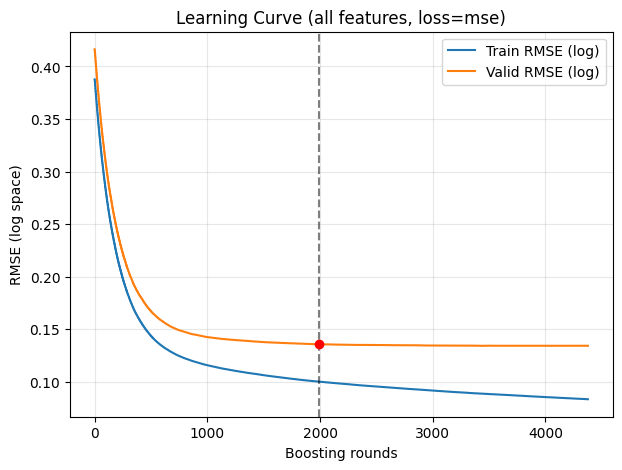

[Best round = 1988]  (log-space valid RMSE shown in plot)
Train -> RMSE=16799.50 | MAE=10527.80 | MAPE=6.04%
Valid -> RMSE=23431.65 | MAE=15520.78 | MAPE=9.54%


In [63]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ===============================
# 0) 配置
# ===============================
TRAIN_PATH = './data/featured/Method2,selected/train_Method2_selected.csv'
TEST_PATH  = './data/featured/Method2,selected/test_Method2_selected.csv'  # 若要推論可用
TEST_SIZE = 0.3
RANDOM_STATE = 42

# === 選擇 loss：'mse'（原本）、'phuber'（Pseudo-Huber）、'quantile'（MAE/分位數）===
LOSS = 'mse'        # <- 改這裡：'mse' | 'phuber' | 'quantile'
PHUBER_DELTA = 1.0  # Pseudo-Huber（0.8~1.5 可微調）
QUANTILE_ALPHA = .5 # 0.5=MAE；>0.5 偏上分位

# XGBoost 參數（用 xgb.train 原生命名）
XGB_PARAMS = {
    #'eta': 0.013333333333333334,   # = learning_rate
    'eta': 0.012,   # = learning_rate
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'alpha': 0.4,                  # = reg_alpha
    'lambda': 8.0,                 # = reg_lambda
    'gamma': 0.0,
    'seed': RANDOM_STATE,
    'eval_metric': 'rmse',         # 日誌回報 rmse（log 空間）
}
NUM_BOOST_ROUND = 6000
EARLY_STOP_ROUNDS = 200

# ===============================
# 自訂 loss & 評估（log 目標）
# ===============================
def phuber_obj(delta=1.0):
    def _obj(preds, dtrain):
        y = dtrain.get_label()
        r = preds - y
        scale = np.sqrt(1.0 + (r / delta) ** 2)
        grad = r / scale
        hess = 1.0 / (scale ** 3)
        return grad, hess
    return _obj

def quantile_obj(alpha=0.5, eps=1e-6):
    def _obj(preds, dtrain):
        y = dtrain.get_label()
        r = preds - y
        grad = np.where(r >= 0, alpha, alpha - 1.0)
        hess = np.full_like(grad, eps)   # 近似常數二階
        return grad, hess
    return _obj

# 注意：你這版 xgboost 的 feval 只能回傳 (name, value)
def rmse_log_eval(preds, dtrain):
    y = dtrain.get_label()
    rmse = float(np.sqrt(np.mean((preds - y) ** 2)))
    return 'rmse', rmse

def build_obj_and_params(loss_name):
    params = dict(XGB_PARAMS)  # 淺拷貝
    if loss_name == 'mse':
        params['objective'] = 'reg:squarederror'
        return None, params
    elif loss_name == 'phuber':
        params.pop('objective', None)
        return phuber_obj(PHUBER_DELTA), params
    elif loss_name == 'quantile':
        params.pop('objective', None)
        return quantile_obj(QUANTILE_ALPHA), params
    else:
        raise ValueError("LOSS must be one of {'mse','phuber','quantile'}")

def metrics_orig(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# ===============================
# 1) 讀資料（使用全部特徵）
# ===============================
df = pd.read_csv(TRAIN_PATH)
X_all = df.drop(columns=['SalePrice'])
y_all = df['SalePrice'].astype(float)

# 7:3 切分
X_tr, X_va, y_tr_raw, y_va_raw = train_test_split(
    X_all, y_all, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True
)

# log 目標
y_tr_log = np.log1p(y_tr_raw)
y_va_log = np.log1p(y_va_raw)

dtrain = xgb.DMatrix(X_tr, label=y_tr_log)
dvalid = xgb.DMatrix(X_va, label=y_va_log)

# ===============================
# 2) 訓練（全部特徵 + 可選 loss + 早停）
# ===============================
obj, train_params = build_obj_and_params(LOSS)

evals_result = {}
booster = xgb.train(
    params=train_params,
    dtrain=dtrain,
    num_boost_round=NUM_BOOST_ROUND,
    evals=[(dtrain, 'train'), (dvalid, 'valid')],
    early_stopping_rounds=EARLY_STOP_ROUNDS,
    verbose_eval=False,
    obj=obj,                 # mse 時為 None；phuber/quantile 時為自訂 obj
    feval=rmse_log_eval,     # 仍用 log-RMSE 做早停
    evals_result=evals_result,
    maximize=False           # 明確指定越小越好
)

# 最佳輪次（不同版本相容）
best_iter = getattr(booster, 'best_iteration', None)
if best_iter is None:
    best_ntree = getattr(booster, 'best_ntree_limit', None)
    best_iter = (best_ntree - 1) if best_ntree is not None else len(evals_result['valid']['rmse']) - 1

# ===============================
# 3) 學習曲線（log 空間）
# ===============================
rmse_tr_log = evals_result['train']['rmse']
rmse_va_log = evals_result['valid']['rmse']

plt.figure(figsize=(7,5))
plt.plot(rmse_tr_log, label='Train RMSE (log)')
plt.plot(rmse_va_log, label='Valid RMSE (log)')
plt.axvline(best_iter, ls='--', c='k', alpha=0.5)
plt.scatter([best_iter], [rmse_va_log[best_iter]], c='r', zorder=3)
plt.title(f'Learning Curve (all features, loss={LOSS})')
plt.xlabel('Boosting rounds'); plt.ylabel('RMSE (log space)')
plt.legend(); plt.grid(alpha=0.3)
plt.show()

# ===============================
# 4) 原尺度評估（只用最佳輪次）
# ===============================
try:
    pred_tr = np.expm1(booster.predict(dtrain, iteration_range=(0, best_iter + 1)))
    pred_va = np.expm1(booster.predict(dvalid, iteration_range=(0, best_iter + 1)))
except TypeError:
    pred_tr = np.expm1(booster.predict(dtrain, ntree_limit=best_iter + 1))
    pred_va = np.expm1(booster.predict(dvalid, ntree_limit=best_iter + 1))

rmse_tr, mae_tr, mape_tr = metrics_orig(y_tr_raw, pred_tr)
rmse_va, mae_va, mape_va = metrics_orig(y_va_raw, pred_va)

print(f"[Best round = {best_iter}]  (log-space valid RMSE shown in plot)")
print(f"Train -> RMSE={rmse_tr:.2f} | MAE={mae_tr:.2f} | MAPE={mape_tr:.2f}%")
print(f"Valid -> RMSE={rmse_va:.2f} | MAE={mae_va:.2f} | MAPE={mape_va:.2f}%")

# ===============================
# 5) （可選）在 test.csv 上做推論並輸出提交檔
# ===============================
DO_PREDICT_TEST = False  # 要提交時改 True
if DO_PREDICT_TEST and os.path.exists(TEST_PATH):
    test_df = pd.read_csv(TEST_PATH)
    dtest = xgb.DMatrix(test_df)
    try:
        test_pred = np.expm1(booster.predict(dtest, iteration_range=(0, best_iter + 1)))
    except TypeError:
        test_pred = np.expm1(booster.predict(dtest, ntree_limit=best_iter + 1))

    sub = pd.DataFrame({
        "Id": test_df["Id"] if "Id" in test_df.columns else np.arange(1461, 1461 + len(test_df)),
        "SalePrice": test_pred
    })
    sub.to_csv("submission_xgb_all_features.csv", index=False)
    print("✅ Saved -> submission_xgb_all_features.csv")


In [65]:
# --------- 工具函数（保持不变） ---------
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def _plot_loss(evals_result, title="Training vs Validation RMSE (log target)"):
    train_key, valid_key, metric = 'validation_0', 'validation_1', 'rmse'
    if (train_key not in evals_result) or (valid_key not in evals_result):
        print("Warning: evals_result_ missing expected keys; skip loss plot.")
        return
    tr = evals_result[train_key].get(metric, None)
    va = evals_result[valid_key].get(metric, None)
    if (tr is None) or (va is None):
        print("Warning: rmse metric not found in evals_result_; skip loss plot.")
        return
    plt.figure(figsize=(7,5))
    plt.plot(tr, label='Train RMSE (log target)')
    plt.plot(va, label='Valid RMSE (log target)')
    plt.xlabel('Boosting rounds'); plt.ylabel('RMSE (log space)')
    plt.title(title); plt.legend(); plt.grid(alpha=0.3); plt.show()


# --------- 只有 Stage A 的两阶段网格（LOG 目标，70/30，CV=5） ---------
def run_stageA_grid_LOG(train_path, label='SalePrice', name='', random_state=42):
    print(f"\n=== Stage A GridSearch (LOG target) on {name} ===")

    # 读取
    df = pd.read_csv(train_path)
    X  = df.drop(columns=[label])
    y0 = df[label].astype(float)
    y  = np.log1p(y0)  # log1p 作为训练目标

    # 70/30 hold-out，只用于最终报告与画曲线
    X_tr, X_va, y0_tr, y0_va = train_test_split(
        X, y0, test_size=0.3, random_state=random_state
    )
    # 与上面切分保持一致的 log 目标
    _, _, y_tr, y_va = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )

    # 基础模型
    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1
    )

    # ---------- Stage A：按你的范围做网格 ----------
    # 建议较大的 n_estimators 以配合较小的学习率（由早停控制有效轮数）
    param_grid_A = {
        'max_depth':        [2, 3],
        'min_child_weight': [5, 8, 10, 12, 15],
        'subsample':        [0.5, 0.6, 0.7, 0.8],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
        'reg_lambda':       [8.0, 12.0, 16.0, 20.0],
        'reg_alpha':        [0.2, 0.4, 0.6, 0.8, 1.0],
        'learning_rate':    [0.01, 0.02, 0.03],
        'n_estimators':     [1000, 2000, 3000, 4000],
        # 说明：gamma 默认 0.0；如需再抑制复杂度可自行加 [0.0, 0.1]
    }

    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',  # log 空间 RMSE
        cv=5,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE (log):", -gsA.best_score_)

    # ---------- 用 Stage A 最优参数重新训练，并记录 eval_set（用于画 loss 曲线） ----------
    best_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1,
        **bestA
    )

    # 兼容性：有些旧版不接受 eval_metric 关键字参数，用 try/except 包一下
    try:
        best_model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            eval_metric='rmse',
            verbose=False
        )
    except TypeError:
        # 旧版：先 set_params 再 fit
        best_model.set_params(eval_metric='rmse')
        best_model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_va, y_va)],
            verbose=False
        )

    evals_result = best_model.evals_result()

    # ---------- 在原始金额尺度评估 ----------
    pred_tr = np.expm1(best_model.predict(X_tr))
    pred_va = np.expm1(best_model.predict(X_va))

    rmse_tr, mae_tr, mape_tr = _metrics(y0_tr, pred_tr)
    rmse_va, mae_va, mape_va = _metrics(y0_va, pred_va)

    print(f"[{name} · LOG] Hold-out Performance (ORIGINAL SCALE, 70/30 split, CV=5)")
    print(f"  ▸ Train  RMSE={rmse_tr:.2f} | MAE={mae_tr:.2f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.2f} | MAE={mae_va:.2f} | MAPE={mape_va:.2f}%")

    # 可视化（原始尺度散点）
    _plot_actual_vs_pred(
        y0_tr, pred_tr,
        f"{name} — Train [LOG · Stage A]\nRMSE={rmse_tr:.2f} | MAE={mae_tr:.2f} | MAPE={mape_tr:.2f}%"
    )
    _plot_actual_vs_pred(
        y0_va, pred_va,
        f"{name} — Valid 30% [LOG · Stage A]\nRMSE={rmse_va:.2f} | MAE={mae_va:.2f} | MAPE={mape_va:.2f}%"
    )

    # 训练过程的损失曲线（log 目标的 RMSE）
    _plot_loss(
        evals_result,
        title=f"{name} — Training vs Validation RMSE per round (log target, Stage A best)"
    )

    return {
        "best_params": bestA,
        "cv_best_rmse": -gsA.best_score_,
        "holdout_metrics": {
            "train": (rmse_tr, mae_tr, mape_tr),
            "valid": (rmse_va, mae_va, mape_va),
        },
        "model": best_model,
        "evals_result": evals_result
    }



=== Stage A GridSearch (LOG target) on Method2_XGBoost_CV_features ===
Fitting 5 folds for each of 38400 candidates, totalling 192000 fits
[Stage A] Best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 2000, 'reg_alpha': 0.2, 'reg_lambda': 16.0, 'subsample': 0.5}
[Stage A] Best CV RMSE (log): 0.13904422233391314
[Method2_XGBoost_CV_features · LOG] Hold-out Performance (ORIGINAL SCALE, 70/30 split, CV=5)
  ▸ Train  RMSE=19935.66 | MAE=11990.01 | MAPE=6.81%
  ▸ Valid  RMSE=23445.76 | MAE=15448.56 | MAPE=9.51%


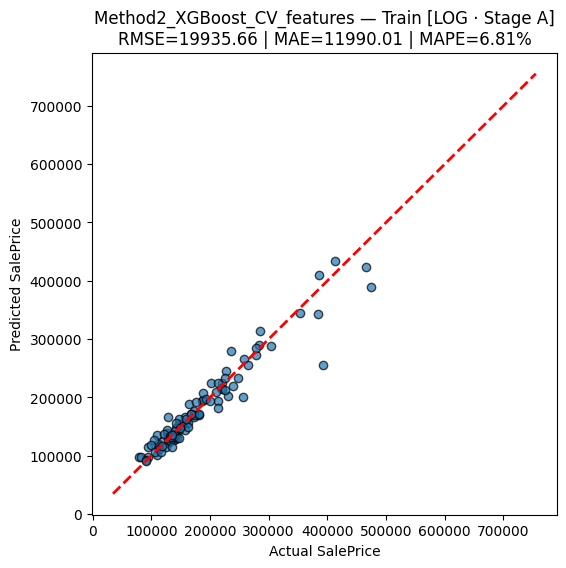

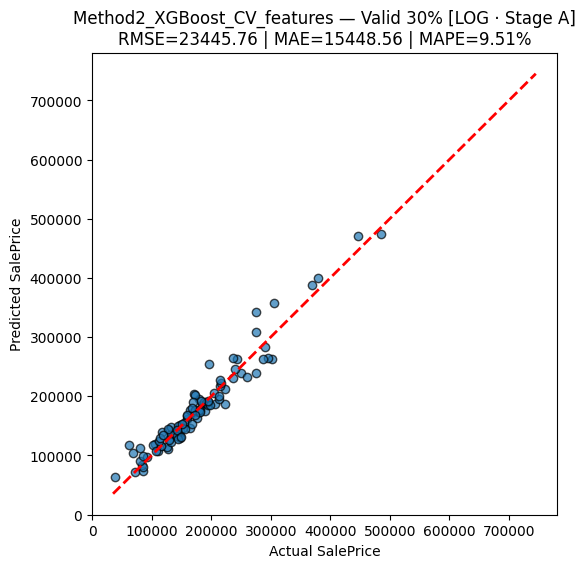

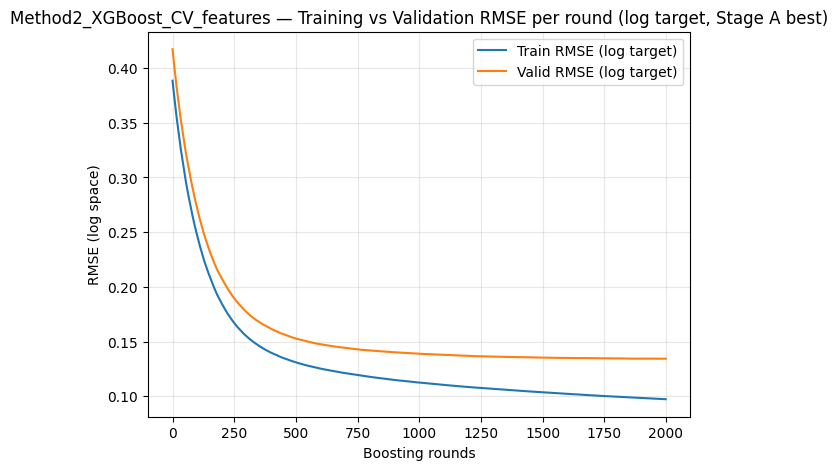

In [ ]:
res_m2 = run_stageA_grid_LOG("./data/featured/Method2,selected/train_Method2_selected.csv",
                             name="Method2_XGBoost_CV_features")


=== Stage A GridSearch (LOG target) on Method3_XGBoost_CV_features ===
Fitting 5 folds for each of 38400 candidates, totalling 192000 fits
[Stage A] Best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 2000, 'reg_alpha': 0.2, 'reg_lambda': 12.0, 'subsample': 0.5}
[Stage A] Best CV RMSE (log): 0.13253612323514014
[Method3_XGBoost_CV_features · LOG] Hold-out Performance (ORIGINAL SCALE, 70/30 split, CV=5)
  ▸ Train  RMSE=19749.70 | MAE=11435.43 | MAPE=6.33%
  ▸ Valid  RMSE=25136.54 | MAE=14873.30 | MAPE=8.90%


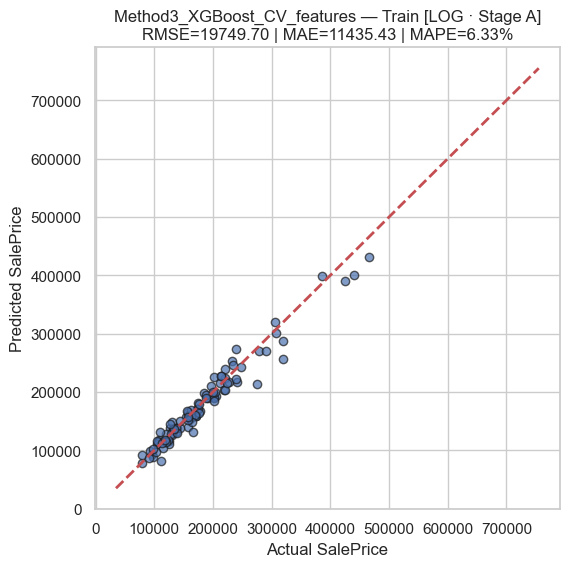

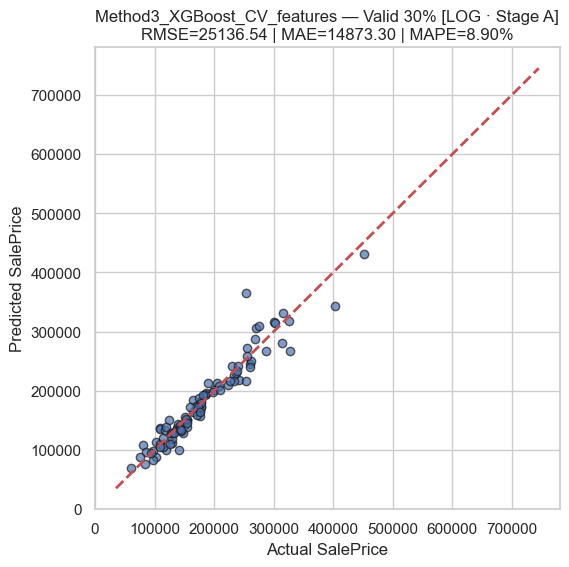

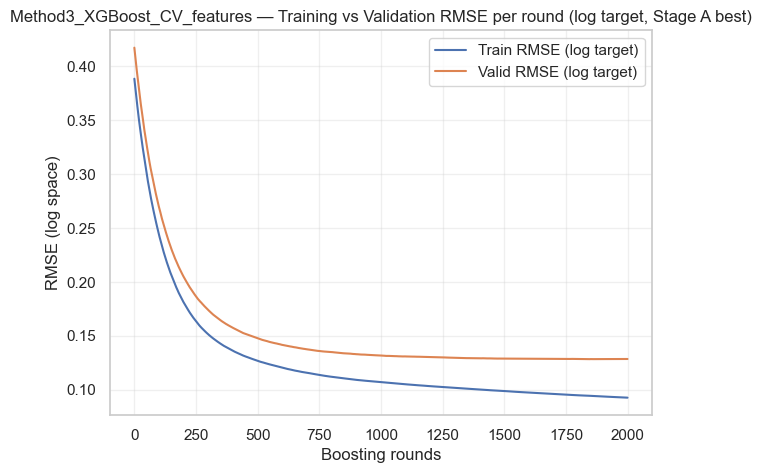

In [137]:
res_m3 = run_stageA_grid_LOG("./data/featured/Method3,selected/train_selected.csv",
                             name="Method3_XGBoost_CV_features")


## method 3

In [ ]:
# 读取数据
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv("./data/cleaned/train.csv")
target = "SalePrice"

### delete hight correlation features

In [ ]:
#计算所有数值特征与目标变量（SalePrice）的 Pearson 相关系数，并按绝对值从大到小排序。
r_target = df[num_cols].corr(method="pearson")[target].sort_values(key=np.abs, ascending=False)
print(r_target.to_string())  

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
ExterQual       -0.636909
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
BsmtQual        -0.593871
KitchenQual     -0.589276
FullBath         0.560881
GarageFinish     0.549809
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
FireplaceQu      0.520507
YearRemodAdd     0.507430
MasVnrArea       0.473452
Fireplaces       0.466968
MasVnrType       0.424464
GarageType       0.415266
HeatingQC       -0.400160
BsmtFinSF1       0.386436
Foundation       0.382671
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
BsmtExposure    -0.309014
HalfBath         0.284400
LotArea          0.263837
GarageYrBlt      0.261413
LotShape        -0.255545
CentralAir       0.251367
GarageCond       0.246749
Electrical       0.234990
PavedDrive       0.231399
BsmtFullBath     0.227082
RoofStyle        0.222369
BsmtUnfSF        0.214446
SaleConditio

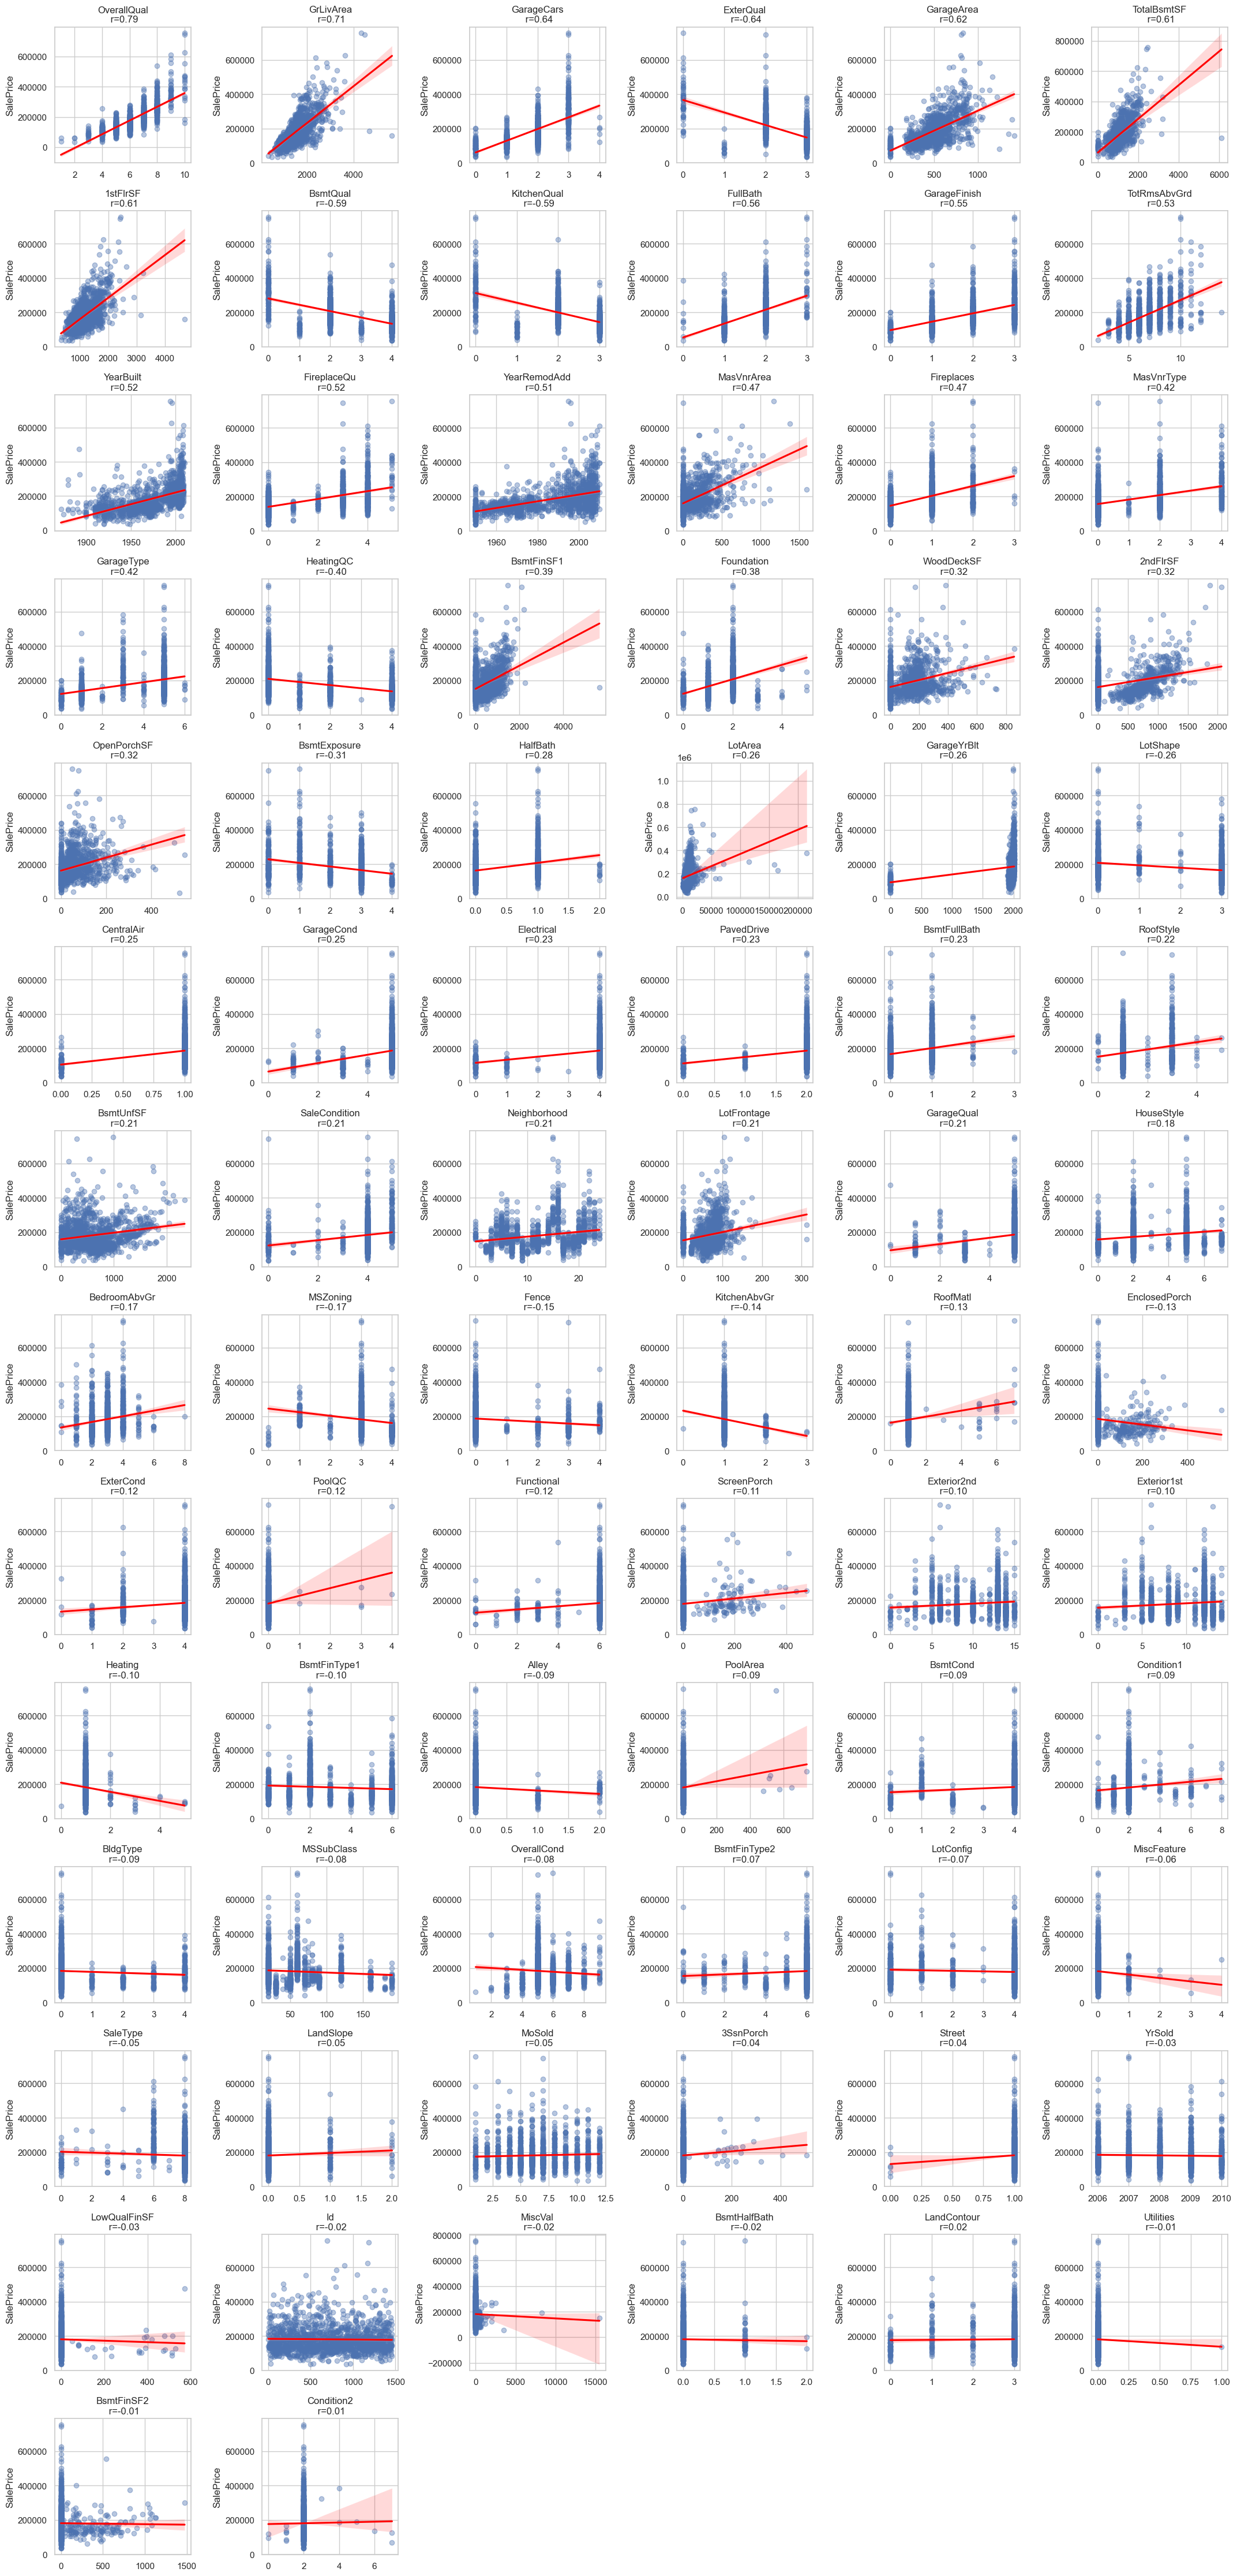

In [ ]:

# 可视化特征与目标的关系
num_cols = df.select_dtypes(include=['number']).columns.tolist()
order = r_target.drop(labels=[target]).abs().sort_values(ascending=False).index
n = len(order); ncols = 6; nrows = int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(3.6*ncols, 3.2*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, feat in zip(axes, order):
    sns.regplot(x=df[feat], y=df[target], ax=ax, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    r = df[[feat, target]].corr().iloc[0,1]
    ax.set_title(f"{feat}\n r={r:.2f}"); ax.set_xlabel(""); ax.set_ylabel(target)
for ax in axes[len(order):]: ax.set_visible(False)
plt.tight_layout(); plt.show()


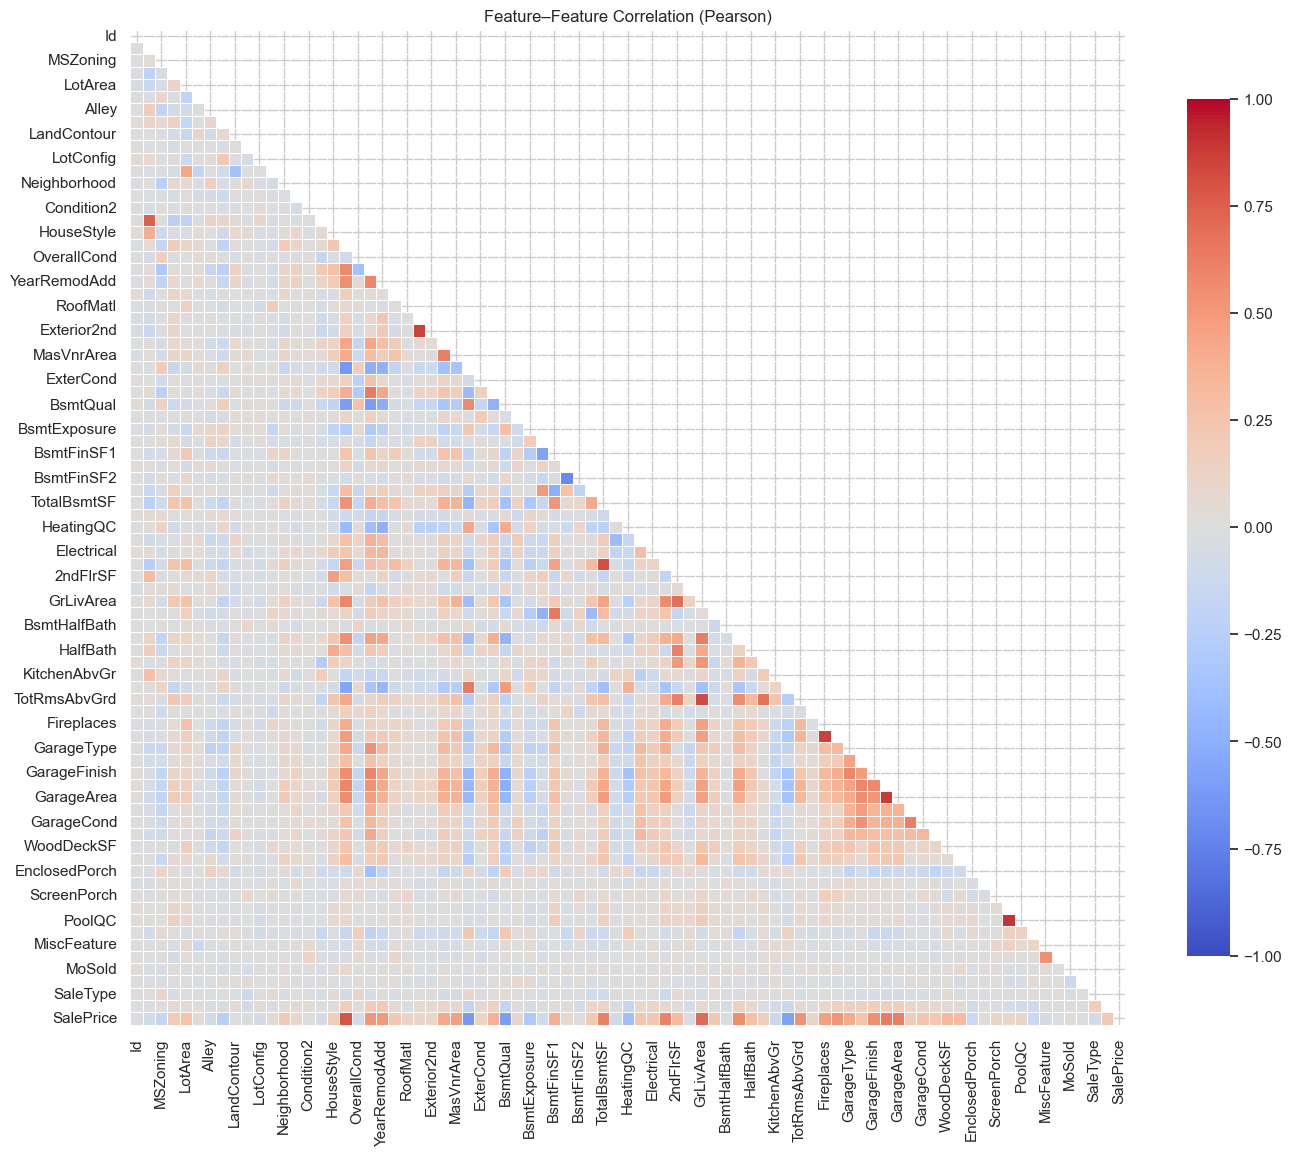

In [ ]:
# 可视化特征之间的关系
corr = df[num_cols].corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14,12))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, vmin=-1, vmax=1,
            square=True, linewidths=.4, cbar_kws={"shrink": .8})
plt.title("Feature–Feature Correlation (Pearson)"); plt.tight_layout(); plt.show()


In [ ]:

# 计算所有数值特征两两之间的皮尔森相关系数，并筛出那些高于阈值的特征对（即强共线特征）。
thr = 0.7  # 可调：0.75~0.90
pairs = (corr.abs()
         .where(~np.eye(len(corr), dtype=bool))
         .stack().reset_index()
         .rename(columns={'level_0':'feat1','level_1':'feat2',0:'abs_r'})
         .sort_values('abs_r', ascending=False))
high_pairs = pairs[pairs['abs_r'] >= thr]
print(high_pairs.to_string())


             feat1         feat2     abs_r
5751      PoolArea        PoolQC  0.899923
5831        PoolQC      PoolArea  0.899923
4941    GarageCars    GarageArea  0.882613
5021    GarageArea    GarageCars  0.882613
4536    Fireplaces   FireplaceQu  0.863152
4616   FireplaceQu    Fireplaces  0.863152
1863   Exterior1st   Exterior2nd  0.854107
1943   Exterior2nd   Exterior1st  0.854107
3733     GrLivArea  TotRmsAbvGrd  0.825576
4366  TotRmsAbvGrd     GrLivArea  0.825576
3082   TotalBsmtSF      1stFlrSF  0.819393
3478      1stFlrSF   TotalBsmtSF  0.819393
6417     SalePrice   OverallQual  0.791069
1439   OverallQual     SalePrice  0.791069
94      MSSubClass      BldgType  0.746337
1201      BldgType    MSSubClass  0.746337
3759     GrLivArea     SalePrice  0.708618
6446     SalePrice     GrLivArea  0.708618
2835  BsmtFinType2    BsmtFinSF2  0.706284
2915    BsmtFinSF2  BsmtFinType2  0.706284


In [ ]:
# 按与目标的相关强度排序，依次选择代表特征，并把与之高度相关的特征标为删除，从而保留每个相关簇里最有用的那一个。
to_drop = set(); visited = set()
order_for_prune = r_target.drop(labels=[target]).abs().index  # 强到弱

for f in order_for_prune:
    if f in to_drop or f in visited: 
        continue
    visited.add(f)
    buddies = corr[f].abs()
    buddies = buddies[(buddies >= thr) & (~buddies.index.isin({f, target}))].index
    for g in buddies:
        if g not in visited:
            # 若想更严格：仅当 r_target[g] <= r_target[f] 才丢 g
            to_drop.add(g)

print(f"建议删除：{len(to_drop)} 个\n", sorted(to_drop)[:20])
# X_reduced = df.drop(columns=list(to_drop))

建议删除：8 个
 ['1stFlrSF', 'BsmtFinSF2', 'Exterior1st', 'Fireplaces', 'GarageArea', 'MSSubClass', 'PoolArea', 'TotRmsAbvGrd']


### find valuable featured

In [164]:
# 这段代码通过“多参数 × 多次交叉验证”，综合 gain 与 置换重要性，并用“Top-K 命中频率 + 累计贡献”两条规则，筛出在各种训练条件下都稳定有用的特征集合。
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

# ===== 你的数据 =====
df = pd.read_csv("./data/cleaned/train.csv")
target = "SalePrice"

# 从你之前的步骤拿到共线要删的特征
to_drop = ['1stFlrSF', 'BsmtFinSF2', 'Exterior1st', 'Fireplaces', 'GarageArea', 'MSSubClass', 'PoolArea', 'TotRmsAbvGrd']  

# 删掉目标列和共线特征
X = df.drop(columns=[target] + to_drop).select_dtypes(include=[np.number]).copy()
y = df[target].copy()

# ===== 超参数网格（精简但有代表性）=====
param_grid = [
    {"max_depth": 4, "learning_rate": 0.05, "subsample": 0.9, "colsample_bytree": 0.8, "min_child_weight": 1, "reg_lambda": 1.0},
    {"max_depth": 6, "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8, "min_child_weight": 3, "reg_lambda": 1.0},
    {"max_depth": 6, "learning_rate": 0.10, "subsample": 0.8, "colsample_bytree": 0.6, "min_child_weight": 1, "reg_lambda": 1.0},
    {"max_depth": 8, "learning_rate": 0.05, "subsample": 0.7, "colsample_bytree": 0.8, "min_child_weight": 1, "reg_lambda": 2.0},
]

# ===== CV 设置 =====
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # 共10次切分
features = X.columns.tolist()

# 累计容器
gain_sum = pd.Series(0.0, index=features)
perm_sum = pd.Series(0.0, index=features)
topk_hits = pd.Series(0, index=features)
runs = 0

# ===== 训练循环 =====
for params in param_grid:
    for tr_idx, va_idx in rkf.split(X, y):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        model = XGBRegressor(
            n_estimators=600,
            objective="reg:squarederror",
            eval_metric="rmse",
            random_state=42,
            **params
        )
        model.fit(X_tr, y_tr)

        # 1) gain 重要性（归一化到和为1，避免树数影响）
        gain = pd.Series(model.get_booster().get_score(importance_type="gain"))
        gain = gain.reindex(features).fillna(0.0)
        if gain.sum() > 0:
            gain = gain / gain.sum()
        gain_sum += gain

        # 2) permutation importance：在验证集上计算
        pi = permutation_importance(model, X_va, y_va, n_repeats=5, random_state=42, scoring=None)
        perm = pd.Series(pi.importances_mean, index=features)
        # 负值置零（有时噪声会出现负提升）
        perm[perm < 0] = 0.0
        if perm.sum() > 0:
            perm = perm / perm.sum()
        perm_sum += perm

        # 3) 统计“进入Top-K”的频次（K按特征数的20%取整，至少10个）
        K = max(10, int(len(features) * 0.2))
        topk = gain.sort_values(ascending=False).head(K).index
        topk_hits[topk] += 1

        runs += 1

# ===== 汇总稳定性指标 =====
res = pd.DataFrame({
    "mean_gain": (gain_sum / runs),
    "mean_perm": (perm_sum / runs),
    "freq_topk": (topk_hits / runs)  # 出现Top-K的比例
})
# 综合评分：加权平均（你也可以改成别的）
res["score"] = 0.6 * res["mean_gain"] + 0.4 * res["mean_perm"]
res = res.sort_values("score", ascending=False)

# ===== 选择规则（可调）=====
# 规则A：Top-K 进入频次 ≥ 0.6
stable = res[res["freq_topk"] >= 0.6]

# 规则B：按综合分的累计占比到95%
cum = res["score"].cumsum() / res["score"].sum()
cut = cum[cum <= 0.95].index
selected = list(set(stable.index).union(set(cut)))  # 稳定 + 累计占比

print(f"总特征数：{len(features)}")
print(f"稳定选择后保留：{len(selected)}")
print("\n全部稳定特征（按score）：")
print(res.loc[selected].sort_values("score", ascending=False).to_string())

# 你最终可以这样得到筛选后的 X：
X_selected = X[selected]


总特征数：72
稳定选择后保留：31

全部稳定特征（按score）：
               mean_gain  mean_perm  freq_topk     score
OverallQual     0.276882   0.388237   1.000000  0.321424
GarageCars      0.237019   0.037893   1.000000  0.157369
GrLivArea       0.032988   0.254279   1.000000  0.121505
ExterQual       0.114707   0.006413   1.000000  0.071390
TotalBsmtSF     0.017326   0.064985   1.000000  0.036389
BsmtQual        0.044551   0.009619   1.000000  0.030578
FullBath        0.034777   0.004782   0.883333  0.022779
BsmtFinSF1      0.010427   0.028192   0.800000  0.017533
KitchenQual     0.023057   0.006124   0.983333  0.016284
YearBuilt       0.006024   0.024117   0.116667  0.013261
Neighborhood    0.004161   0.025743   0.000000  0.012794
CentralAir      0.019924   0.001091   0.950000  0.012390
2ndFlrSF        0.010747   0.014642   0.650000  0.012305
LotArea         0.004110   0.022596   0.000000  0.011504
OverallCond     0.004299   0.020514   0.000000  0.010785
FireplaceQu     0.012041   0.008516   0.783333  0.01

### generate new feature file

In [120]:
import os
import pandas as pd

# 原始路径
input_folder = "./data/cleaned"
output_folder = "./data/featured/Method3,selected/"

# 创建新文件夹（不存在就创建）
os.makedirs(output_folder, exist_ok=True)

# 读取原始数据
train = pd.read_csv(f"{input_folder}/train.csv")
test = pd.read_csv(f"{input_folder}/test.csv")

# ===== 你筛选出的稳定特征 =====
selected_features = [
    'OverallQual', 'GarageCars', 'GrLivArea', 'ExterQual', 'TotalBsmtSF',
    'BsmtQual', 'FullBath', 'BsmtFinSF1', 'KitchenQual', 'YearBuilt',
    'Neighborhood', 'CentralAir', '2ndFlrSF', 'LotArea', 'OverallCond',
    'FireplaceQu', 'YearRemodAdd', 'GarageFinish', 'KitchenAbvGr',
    'GarageType', 'LandContour', 'MSZoning', 'LotFrontage', 'SaleCondition',
    'BsmtFullBath', 'RoofMatl', 'BsmtExposure', 'HalfBath', 'BedroomAbvGr',
    'GarageYrBlt', 'BsmtFinType1'
]

# ===== 对train和test进行筛选 =====
train_selected = train[selected_features + ['SalePrice']]
test_selected = test[[col for col in selected_features if col in test.columns]]

# ===== 保存结果 =====
train_selected.to_csv(f"{output_folder}/train_selected.csv", index=False)
test_selected.to_csv(f"{output_folder}/test_selected.csv", index=False)

print(f"✅ 已生成：{output_folder}/train_selected.csv 和 test_selected.csv")
print(f"Train shape: {train_selected.shape}")
print(f"Test shape: {test_selected.shape}")


✅ 已生成：./data/featured/Method3,selected//train_selected.csv 和 test_selected.csv
Train shape: (1459, 32)
Test shape: (1459, 31)
